# Demo of blockchain failure analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import experiment

## Experiment 1: Simple read-write access pattern

Assumes peers all operate under the following access pattern repeatedly:
- Reads a random key, then immediately
- Writes the same key

We assume the keys are selected following a discrete zipfian distribution, parameterized by $l$, $h$, and $\alpha$. For each integer key $k \in [l, h]$, the probability of $k$ is:

$$P(k) = \frac{\alpha^{-k}}{\sum_{i=l}^{h} \alpha^{-i}}$$

Assuming the range of keys are 1-10, we visualize some distributions:

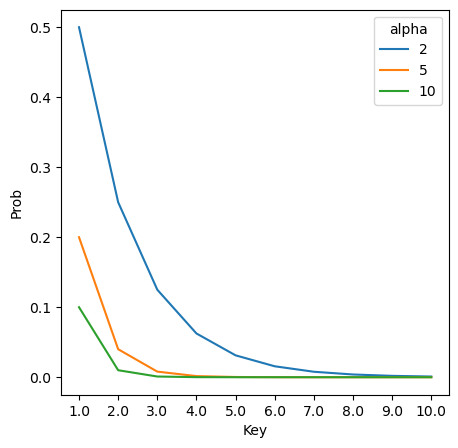

In [2]:
# Show some zipfian distribution
l, h = 1, 10
alphas = [2, 5, 10]
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
keys = np.linspace(l, h, h-l+1)
for alpha in alphas:
    probs = alpha ** np.negative(keys)
    ax.plot(keys, probs, label=alpha)
ax.legend(title='alpha', loc='upper right')
ax.set_xlabel('Key')
ax.set_ylabel('Prob')
ax.set_xticks(keys)
ax.set_xticklabels(keys)
plt.show()

In [2]:
# Show how simulator works
# Block size: 8
# Peer count: 20
# Key distribution: Zipfian with alpha = 5, min = 1, max = 10
# Number of operations: 80

blocks, succeeds, op_count, success_count = experiment.rw_experiment(
    num_ops=80, block_size=8, n_peers=20, key_range_min=1, key_range_max=10, zipfian_alpha=5
)

print('Received tnxs {}, succeeded {}, success rate {:.2f}%'.format(
    op_count, success_count, success_count * 100 / op_count
))

Received tnxs 80, succeeded 45, success rate 56.25%


In [7]:
# print each block
for idx, bs in enumerate(zip(blocks, succeeds)):
    print('--- block {}'.format(idx))
    block, success = bs
    for tnx, result in zip(block, success):
        output = "[PASS]"
        if result == 0:
            output = "[FAIL]"
        output += " " + tnx.user + " " + tnx.tnx_type + " " + str(int(tnx.key))
        print(output)

--- block 0
[PASS] Peer0 read 1
[PASS] Peer19 read 1
[PASS] Peer6 read 1
[PASS] Peer10 read 1
[PASS] Peer4 read 1
[PASS] Peer15 read 1
[PASS] Peer17 read 1
[PASS] Peer9 read 1
--- block 1
[PASS] Peer3 read 1
[PASS] Peer8 read 1
[PASS] Peer7 read 1
[PASS] Peer2 read 1
[PASS] Peer14 read 4
[PASS] Peer12 read 1
[PASS] Peer1 read 2
[PASS] Peer16 read 1
--- block 2
[PASS] Peer13 read 2
[FAIL] Peer5 read 1
[PASS] Peer18 read 4
[FAIL] Peer11 read 1
[FAIL] Peer0 write 1
[FAIL] Peer15 write 1
[FAIL] Peer6 write 1
[FAIL] Peer10 write 1
--- block 3
[PASS] Peer9 write 1
[PASS] Peer19 write 1
[PASS] Peer4 write 1
[PASS] Peer17 write 1
[PASS] Peer12 write 1
[PASS] Peer1 write 2
[PASS] Peer16 write 1
[PASS] Peer8 write 1
--- block 4
[FAIL] Peer2 write 1
[FAIL] Peer7 write 1
[FAIL] Peer3 write 1
[PASS] Peer14 write 4
[FAIL] Peer11 write 1
[FAIL] Peer6 read 1
[PASS] Peer13 write 2
[FAIL] Peer5 write 1
--- block 5
[PASS] Peer18 write 4
[PASS] Peer15 read 1
[PASS] Peer0 read 1
[PASS] Peer10 read 2
[PASS]